In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline

In [2]:
# Shi-Tomasi parameters
feature_params = dict(maxCorners = 300, 
                      qualityLevel = 0.2, 
                      minDistance = 2, 
                      blockSize = 7
                      )

# Lucas-Kanade parameters
lk_params = dict(winSize = (15,15), 
                 maxLevel = 2, 
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)
                 )


In [3]:
# Image directory path
image_dir = '../data/0016_still'
image_files = sorted(glob(image_dir+'/*'))

# Reading the images
images = []
for image in image_files:
    images.append(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY))

# Taking the first image to be the reference image
reference_image = images[0]

In [4]:
# Get the Harris Corner for the Reference Image

# reference_features = cv2.goodFeaturesToTrack(reference_image, maxCorners = 5000, qualityLevel = 0.03, minDistance = 40, blockSize = 20, mask = None, useHarrisDetector = True)
reference_features = cv2.goodFeaturesToTrack(reference_image, 
                              mask = None, 
                              **feature_params)

# corners = reference_features
# corners = np.int0(corners)

# for i in corners:
#     x,y = i.ravel()
#     cv2.circle(images[0],(x,y),6,255,-1)

# plt.imshow(images[0])
# plt.show()

In [5]:
# Get the optical flow of the reference  
optical_flow = [ [(i.ravel()[0], i.ravel()[1])] for i in reference_features]

# Initialise the optical flow with the reference features

# We take only those corner points who are correctly tracked in 
# all the frames for optical flow. i.e. We take intersection
for i in range(1,len(images)):
    current_image = images[i]
    
    # Calculate the optical flow
    current_features, status, error = cv2.calcOpticalFlowPyrLK(reference_image, 
                                                  current_image, 
                                                  reference_features, 
                                                  None, 
                                                  **lk_params)
    
    reference_features = reference_features[status == 1]
    current_features = current_features[status == 1]

    
    # Remove those points from optical flow where the features go out of the image
    optical_flow = [optical_flow[i] for i, j in enumerate(status) if j == 1]
    
    for i, feature in enumerate(current_features):
        optical_flow[i].append((feature.ravel()[0], feature.ravel()[1]))
        
    reference_features = reference_features.reshape((reference_features.shape[0],1,2))
    

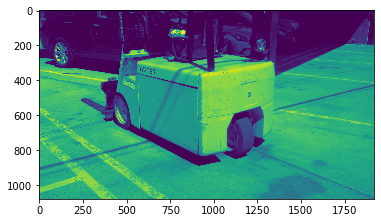

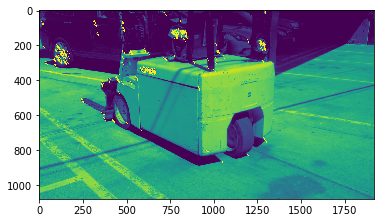

In [7]:
# Draw Optical Flow
image = reference_image.copy()
plt.imshow(image)
plt.show()
mask = np.zeros_like(image)
for corner in optical_flow:
    corner = np.array(corner, np.int32).reshape((-1,1,2))
    cv2.polylines(mask, [corner], False, (255,0,0))
image = cv2.add(image, mask)
plt.imshow(image)
plt.show()